In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> سوال 1 آمار توصیفی </div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [2]:
df = pd.read_excel('df_q1.xlsx')
df.head()


,age,relation,degree,occupationalst
0,66,Head,Diploma,IncomeWOJob
1,61,Spouse,College,IncomeWOJob
2,36,Head,Elemantry,employed
3,33,Spouse,Secondary,Housewife
4,12,Child,Elemantry,Student


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی دیتا </div>


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515659 entries, 0 to 515658
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   age             515659 non-null  int64 
 1   relation        515659 non-null  object
 2   degree          399598 non-null  object
 3   occupationalst  438347 non-null  object
dtypes: int64(1), object(3)
memory usage: 15.7+ MB


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> یافتن مقادیر گمشده </div>


In [4]:
df.isnull().sum()


age                    0
relation               0
degree            116061
occupationalst     77312
dtype: int64

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> هندل کردن مقادیر گمشده </div>


In [5]:
df['degree'].fillna('Unknown', inplace=True)
df['occupationalst'].fillna('Unknown', inplace=True)


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> ایجاد گروه های سنی برای رسم بهتر توزیع </div>


In [6]:
age_bins = [0, 18, 30, 50, 65, 100]
age_labels = ['Under 18', '18-30', '31-50', '51-65', 'Above 65']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

df.head()


,age,relation,degree,occupationalst,age_group
0,66,Head,Diploma,IncomeWOJob,Above 65
1,61,Spouse,College,IncomeWOJob,51-65
2,36,Head,Elemantry,employed,31-50
3,33,Spouse,Secondary,Housewife,31-50
4,12,Child,Elemantry,Student,Under 18


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار توزیع سن </div>


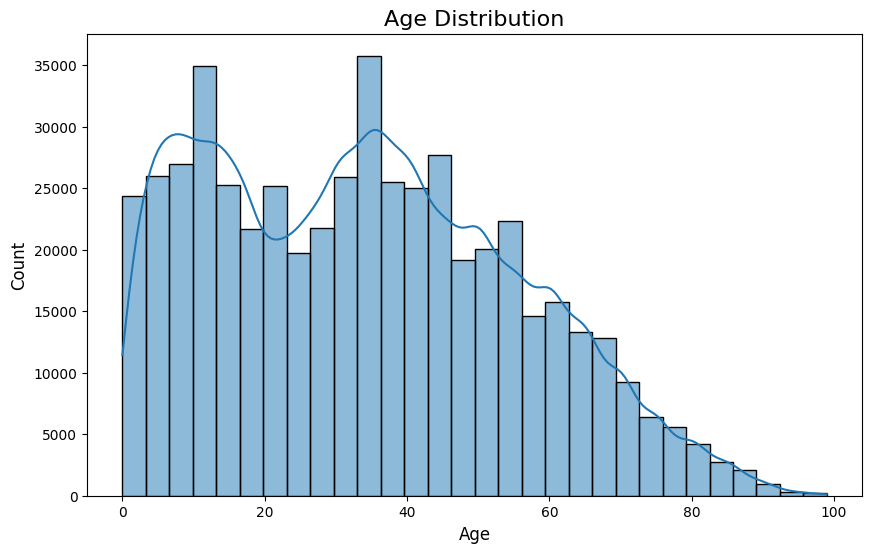

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار توزیع میزان تحصیلات </div>


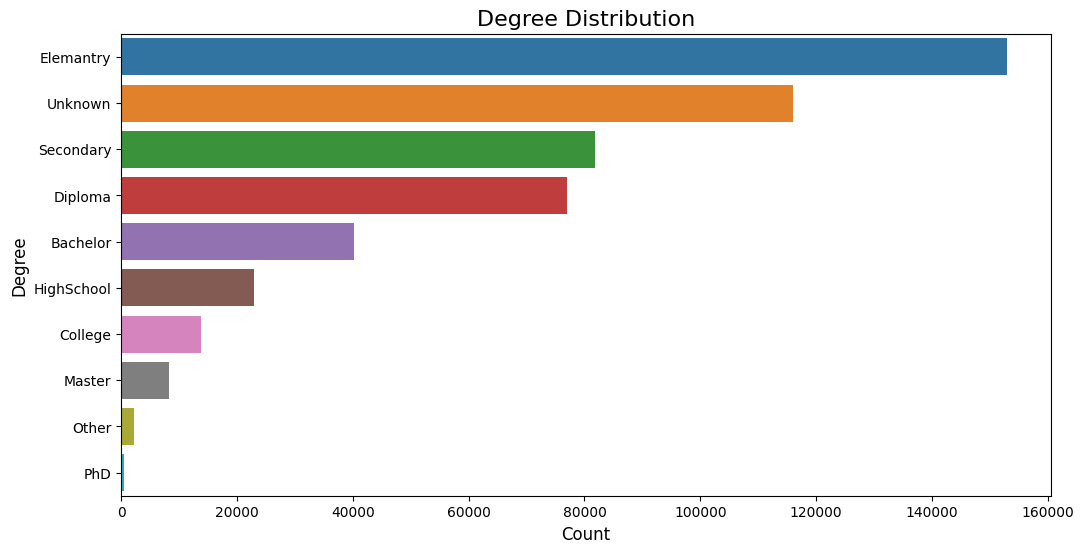

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(y='degree', data=df, order=df['degree'].value_counts().index)
plt.title('Degree Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Degree', fontsize=12)
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار توزیع بستگی با سرپرست </div>


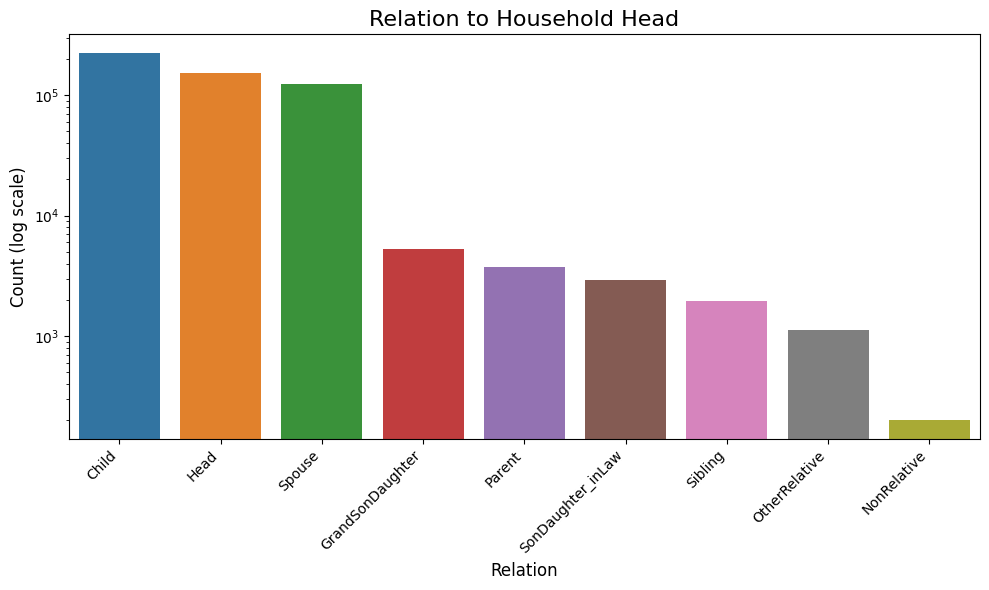

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='relation', data=df, order=df['relation'].value_counts().index)
plt.yscale('log')
plt.title('Relation to Household Head', fontsize=16)
plt.xlabel('Relation', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار توزیع وضعیت فعالیت </div>


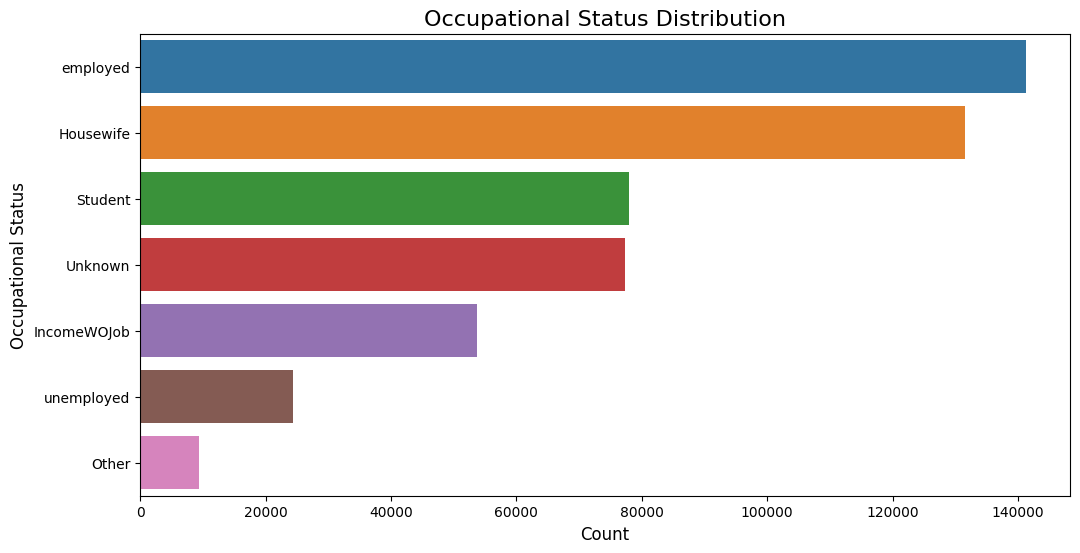

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(y='occupationalst', data=df, order=df['occupationalst'].value_counts().index)
plt.title('Occupational Status Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Occupational Status', fontsize=12)
plt.show()


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> سوال 2 آمار توصیفی </div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [11]:
df = pd.read_excel('df_q2.xlsx')
df.head()


,vehicle,motorcycle,bicycle,year
0,True,False,False,98
1,True,False,True,98
2,True,True,False,98
3,False,False,False,98
4,True,True,True,98


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی دیتا </div>


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153736 entries, 0 to 153735
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   vehicle     153736 non-null  bool 
 1   motorcycle  153736 non-null  bool 
 2   bicycle     153736 non-null  bool 
 3   year        153736 non-null  int64
dtypes: bool(3), int64(1)
memory usage: 1.6 MB


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی مقادیر گمشده </div>


In [13]:
df.isnull().sum()


vehicle       0
motorcycle    0
bicycle       0
year          0
dtype: int64

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> آماده‌سازی دیتا برای ترسیم نمودار </div>


In [14]:
df_melted = df.melt(id_vars='year', value_vars=['vehicle', 'motorcycle', 'bicycle'], var_name='vehicle_type', value_name='usage')

df_filtered = df_melted[df_melted['usage'] == True]

df_grouped = df_filtered.groupby(['year', 'vehicle_type']).size().reset_index(name='count')


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار توزیع </div>


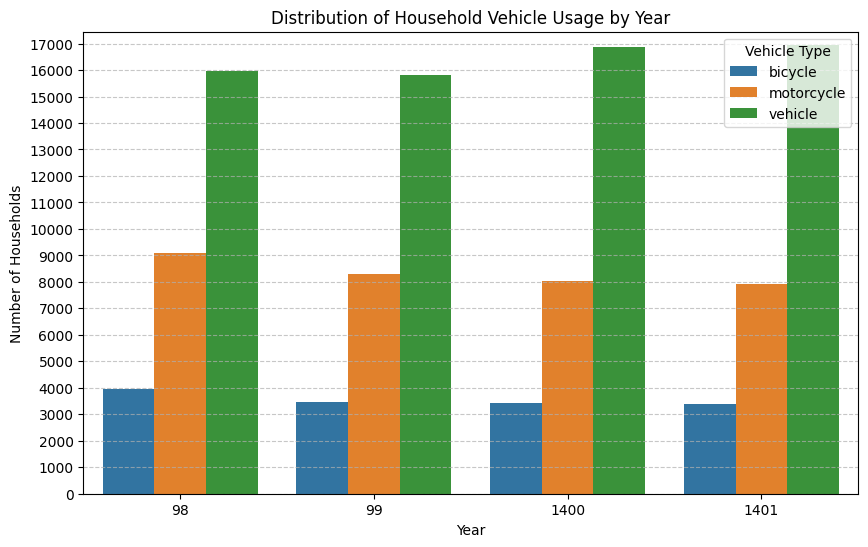

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='year', y='count', hue='vehicle_type', errorbar=None, dodge=True)
plt.ylim(0, df_grouped['count'].max() + 500)
plt.yticks(range(0, df_grouped['count'].max() + 1000, 1000))
plt.title('Distribution of Household Vehicle Usage by Year')
plt.xlabel('Year')
plt.ylabel('Number of Households')
plt.legend(title='Vehicle Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> سوال 3 آمار توصیفی </div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [16]:
df_q3 = pd.read_excel("df_q3.xlsx")
df_q3.head()


,income_pension,Address,code,mortgage,purchased,value,year
0,NaN,20001385412,42111,NaN,NaN,1500000,98
1,NaN,20001385412,44111,NaN,1,300000,98
2,NaN,20001385412,45111,NaN,1,300000,98
3,NaN,20001385412,45211,NaN,1,700000,98
4,0154000000,20001385423,42111,NaN,NaN,2000000,98


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی داده ها </div>


In [17]:
df_q3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665014 entries, 0 to 665013
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   income_pension  402332 non-null  object
 1   Address         665014 non-null  int64 
 2   code            665014 non-null  int64 
 3   mortgage        230953 non-null  object
 4   purchased       577371 non-null  object
 5   value           665014 non-null  int64 
 6   year            665014 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 35.5+ MB


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> پر کردن مقادیر گمشده و تبدیل مقادیر غیر عددی به عدد و بررسی مقادیر </div>


In [18]:
df_q3['income_pension'] = df_q3['income_pension'].replace('', 0).fillna(0)
def convert_to_int(value):
    try:
        return int(value) 
    except ValueError:
        return 0

df_q3['income_pension'] = df_q3['income_pension'].apply(convert_to_int)


In [19]:
df_q3.isna().sum()


income_pension         0
Address                0
code                   0
mortgage          434061
purchased          87643
value                  0
year                   0
dtype: int64

In [20]:
df_q3.income_pension.value_counts()


income_pension
0            528007
250000000      1701
360000000      1385
370000000      1381
190000000      1343
              ...  
77040000          1
558500000         1
37640000          1
149120000         1
13800000          1
Name: count, Length: 4046, dtype: int64

In [21]:
df_q3.mortgage.value_counts()


mortgage
               214666
100000000        1155
50000000          802
200000000         779
300000000         600
                ...  
2100000000          1
680000000           1
28000000            1
7000000000          1
0690000000          1
Name: count, Length: 343, dtype: int64

In [22]:
df_q3['mortgage'] = df_q3['mortgage'].replace('', 0).fillna(0)
df_q3['mortgage'] = df_q3['mortgage'].apply(convert_to_int)


In [23]:
df_q3.mortgage.value_counts()


mortgage
0             648728
100000000       2051
200000000       1520
50000000        1398
300000000       1190
               ...  
4600000000         1
490000000          1
235000000          1
460000000          1
690000000          1
Name: count, Length: 171, dtype: int64

In [24]:
df_q3.purchased.value_counts()


purchased
1    518096
      44297
8     11884
2      1809
3       676
5       511
7        59
6        29
4        10
Name: count, dtype: int64

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار توزیع ستون purchased</div>


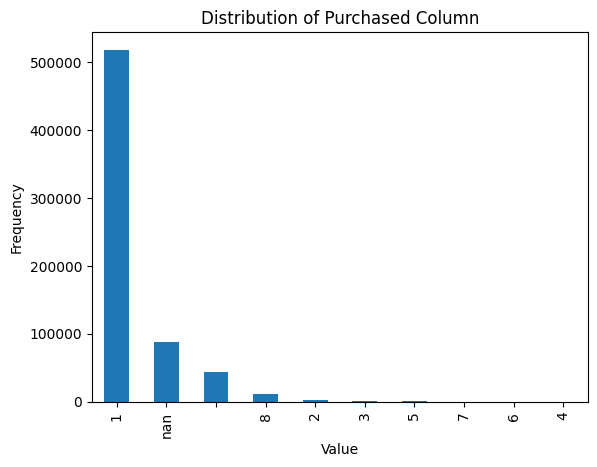

In [25]:
df = df_q3.copy()
df['purchased'] = df_q3['purchased'].astype(str)
distribution = df['purchased'].value_counts()
distribution.plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Purchased Column')
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> پر کردن مقادیر گمشده و تبدیل مقادیر غیر عددی به عدد و بررسی مقادیر </div>


In [26]:
df_q3['purchased'] = df_q3['purchased'].replace('', 1).fillna(1)
df_q3['purchased'] = df_q3['purchased'].apply(convert_to_int)


In [27]:
df_q3['purchased'] = df_q3['purchased'].replace(0, 1)


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار توزیع ستون purchased</div>


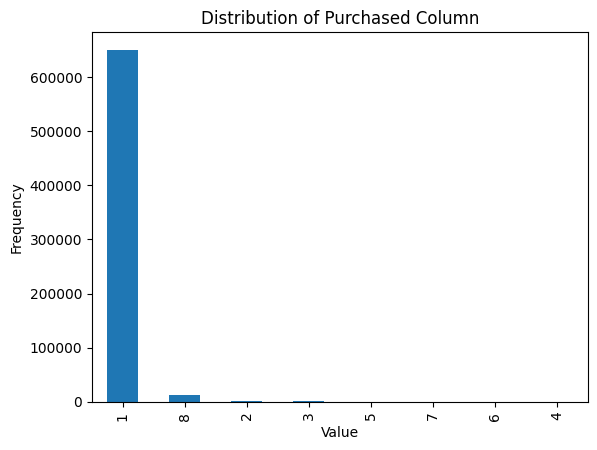

In [28]:
df = df_q3.copy()
df['purchased'] = df_q3['purchased'].astype(str)
distribution = df['purchased'].value_counts()
distribution.plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Purchased Column')
plt.show()


In [29]:
df_q3.purchased.value_counts()


purchased
1    650036
8     11884
2      1809
3       676
5       511
7        59
6        29
4        10
Name: count, dtype: int64

In [30]:
df_q3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665014 entries, 0 to 665013
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   income_pension  665014 non-null  int64
 1   Address         665014 non-null  int64
 2   code            665014 non-null  int64
 3   mortgage        665014 non-null  int64
 4   purchased       665014 non-null  int64
 5   value           665014 non-null  int64
 6   year            665014 non-null  int64
dtypes: int64(7)
memory usage: 35.5 MB


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار های توزیع های خواسته شده </div>


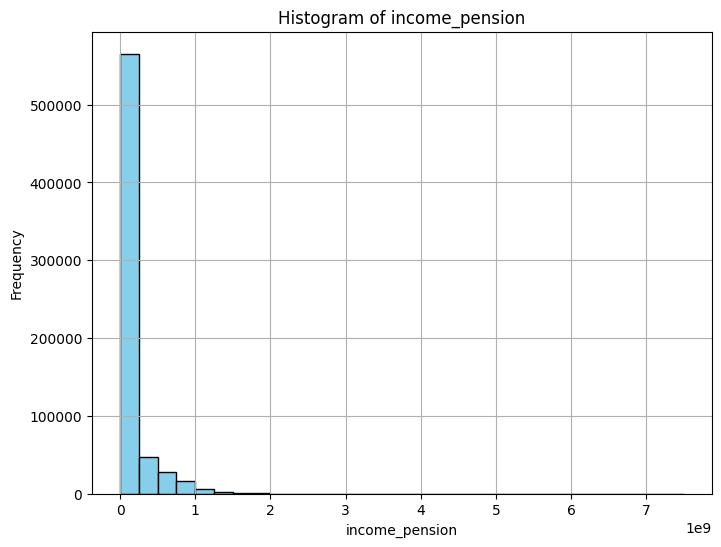

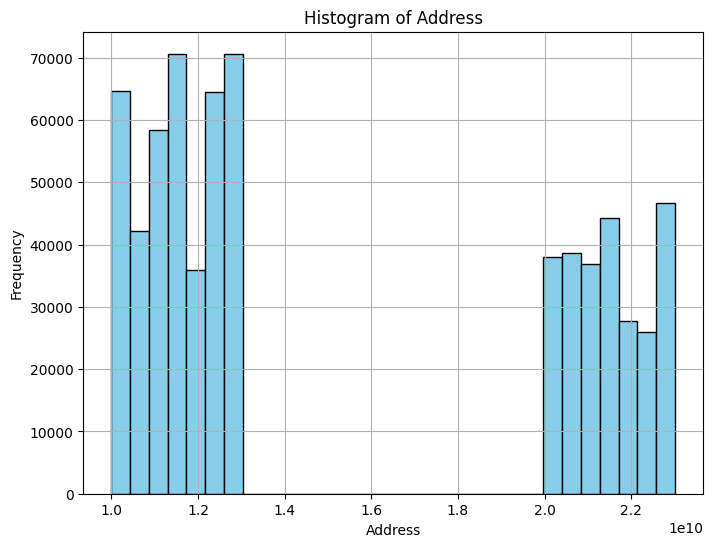

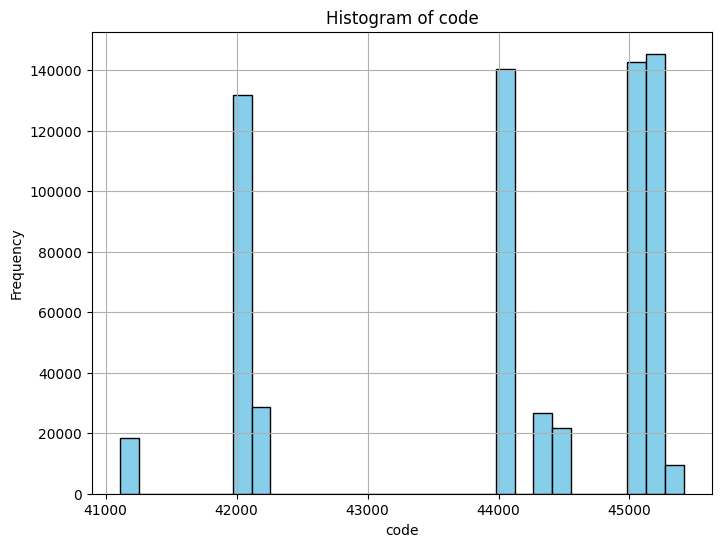

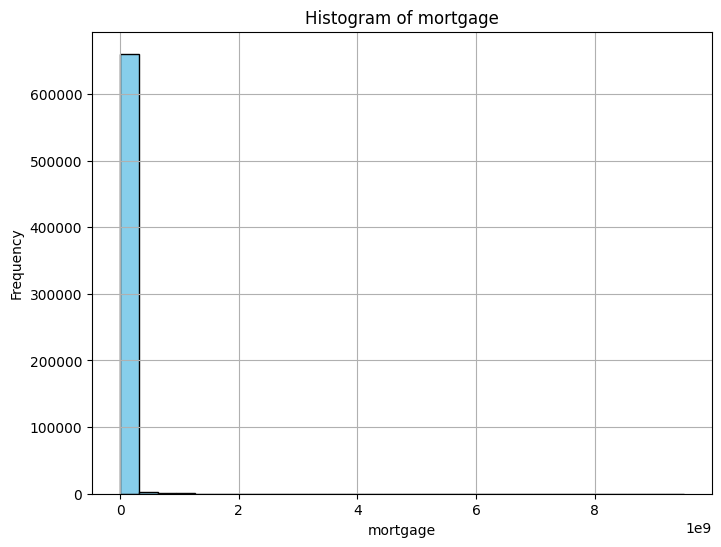

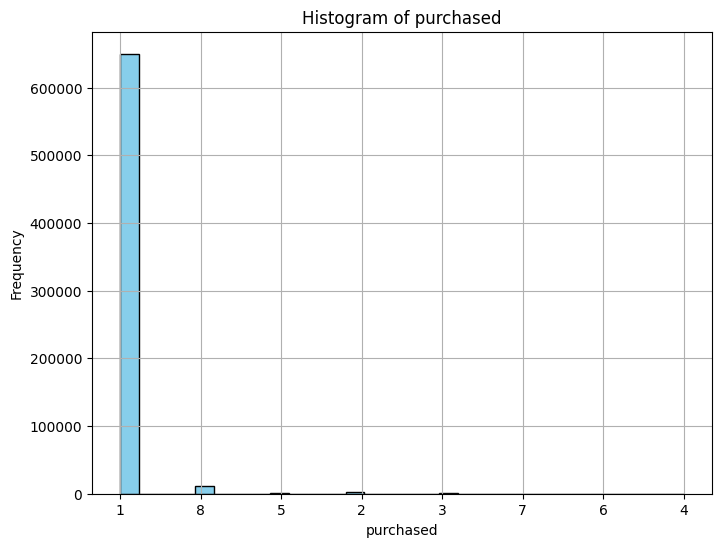

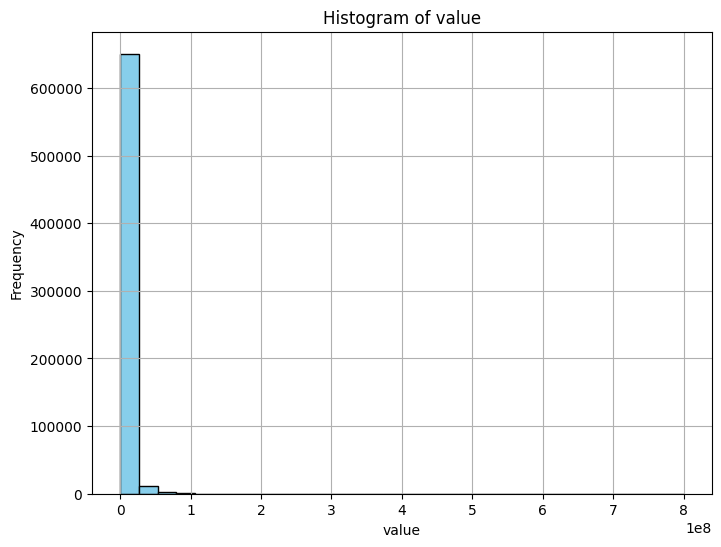

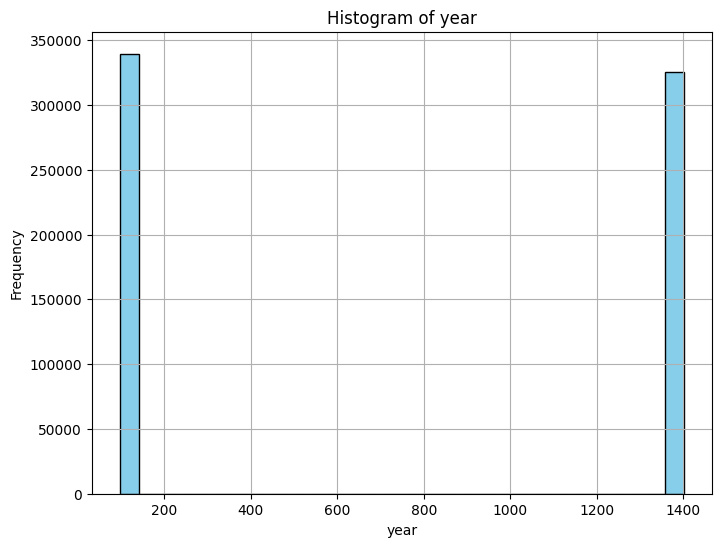

In [31]:
for column in df_q3.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> حذف ستون های اضافی و یکسان سازی مقادیر سال </div>


In [32]:
modifed_df = df_q3.drop('mortgage',  axis=1)
modifed_df['year'] = modifed_df['year'].replace({98: 1398, 99: 1399})
modifed_df


,income_pension,Address,code,purchased,value,year
0,0,20001385412,42111,1,1500000,1398
1,0,20001385412,44111,1,300000,1398
2,0,20001385412,45111,1,300000,1398
3,0,20001385412,45211,1,700000,1398
4,154000000,20001385423,42111,1,2000000,1398
...,...,...,...,...,...,...
665009,0,13006383841,41111,1,5000000,1401
665010,0,13006383841,42212,1,9000000,1401
665011,0,13006383841,44111,1,400000,1401
665012,0,13006383841,45111,1,800000,1401


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> مقایسه توزیع هزینه اجاره املاک و حقوق بازنشستگان </div>


In [33]:
# 1. Pension distribution
pension_distribution = modifed_df.groupby('year')['income_pension'].sum()

# 2. Real estate rental distribution: Filter codes starting with 41 and remove purchased = 8
real_estate_filtered = modifed_df[(modifed_df['code'].astype(str).str.startswith('41')) & (modifed_df['purchased'] != 8)]
real_estate_distribution = real_estate_filtered.groupby('year')['value'].sum()


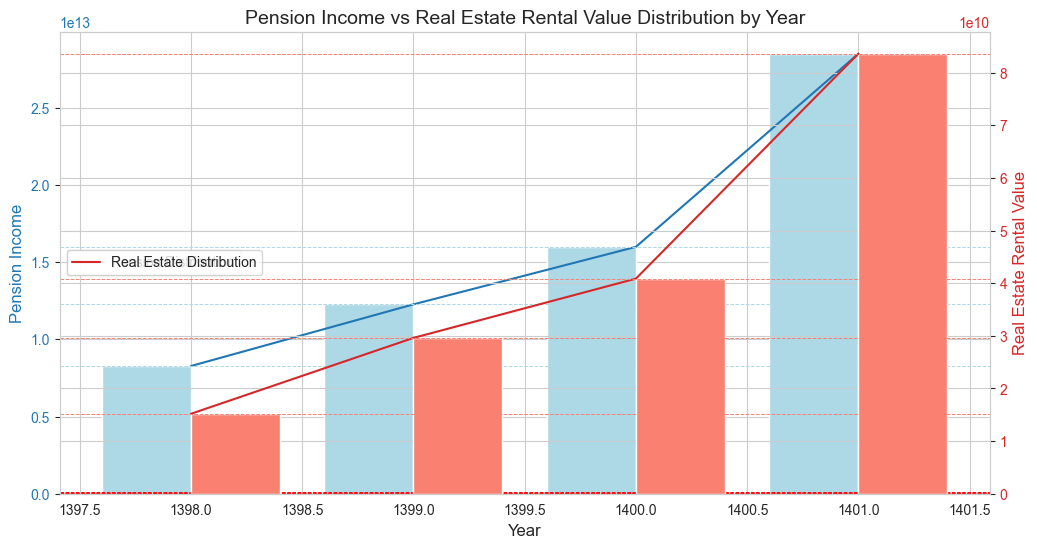

In [34]:
sns.set_style("whitegrid")

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot pension distribution with line and bar
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Pension Income', color='tab:blue', fontsize=12)

# Line plot for Pension Income
sns.lineplot(x=pension_distribution.index, y=pension_distribution.values, ax=ax1, color='tab:blue', label='Pension Distribution')

# Bar plot for Pension Income
ax1.bar(pension_distribution.index - 0.2, pension_distribution.values, width=0.4, color='lightblue', label='Pension Bar')

# Add dashed lines for pension distribution (y-axis)
for y_value in pension_distribution.values:
    ax1.axhline(y=y_value, linestyle='--', color='lightblue', linewidth=0.7)

ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot real estate rental distribution with line and bar
ax2 = ax1.twinx()
ax2.set_ylabel('Real Estate Rental Value', color='tab:red', fontsize=12)

# Line plot for Real Estate Rental Value
sns.lineplot(x=real_estate_distribution.index, y=real_estate_distribution.values, ax=ax2, color='tab:red', label='Real Estate Distribution')

# Bar plot for Real Estate Rental Value
ax2.bar(real_estate_distribution.index + 0.2, real_estate_distribution.values, width=0.4, color='salmon', label='Real Estate Bar')

# Add dashed lines for real estate distribution (y-axis)
for y_value in real_estate_distribution.values:
    ax2.axhline(y=y_value, linestyle='--', color='salmon', linewidth=0.7)

for y_value in real_estate_distribution.values:
    ax1.axhline(y=y_value, linestyle='--', color='red', linewidth=0.7)

ax2.tick_params(axis='y', labelcolor='tab:red')

# Set plot title
plt.title('Pension Income vs Real Estate Rental Value Distribution by Year', fontsize=14)

# Show the plot
plt.show()


In [35]:
pension_distribution


year
1398     8272404756354
1399    12267783868772
1400    15992666938049
1401    28505274670671
Name: income_pension, dtype: int64

In [36]:
real_estate_distribution


year
1398    15183195000
1399    29601020000
1400    40862480000
1401    83594130000
Name: value, dtype: int64

## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> سوال 4 آمار توصیفی </div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [3]:
df_q4 = pd.read_excel('df_q4.xlsx')
df_q4.head()


,Address,code,purchased,value,year
0,20001384223,111123,1,120000,98
1,20001384223,111133,1,40000,98
2,20001384207,111143,1,300000,98
3,20001384220,111143,1,300000,98
4,20001384220,111144,1,120000,98


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی داده ها </div>


In [4]:
df_q4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94616 entries, 0 to 94615
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Address    94616 non-null  int64
 1   code       94616 non-null  int64
 2   purchased  94616 non-null  int64
 3   value      94616 non-null  int64
 4   year       94616 non-null  int64
dtypes: int64(5)
memory usage: 3.6 MB


In [5]:
df_q4.isna().sum()


Address      0
code         0
purchased    0
value        0
year         0
dtype: int64

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> تبدیل مقادیر </div>


In [6]:
df_q4_n = df_q4[~df_q4['code'].astype(str).str.startswith('1120')]
df_q4_n


,Address,code,purchased,value,year
0,20001384223,111123,1,120000,98
1,20001384223,111133,1,40000,98
2,20001384207,111143,1,300000,98
3,20001384220,111143,1,300000,98
4,20001384220,111144,1,120000,98
...,...,...,...,...,...
94611,13006383041,111124,1,250000,1401
94612,13006383041,111133,1,150000,1401
94613,13006383826,111134,1,600000,1401
94614,13006383826,111141,1,750000,1401


In [7]:
df_q4_n = df_q4_n[ (df_q4_n['purchased'] != 8)]
df_q4_n


,Address,code,purchased,value,year
0,20001384223,111123,1,120000,98
1,20001384223,111133,1,40000,98
2,20001384207,111143,1,300000,98
3,20001384220,111143,1,300000,98
4,20001384220,111144,1,120000,98
...,...,...,...,...,...
94611,13006383041,111124,1,250000,1401
94612,13006383041,111133,1,150000,1401
94613,13006383826,111134,1,600000,1401
94614,13006383826,111141,1,750000,1401


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> ترکیب مقادیر </div>


In [11]:
grouped_df = df_q4_n.groupby('Address').agg({
    'purchased': 'sum',   
    'value': 'sum',       
    'year': 'first'      
}).reset_index()
grouped_df


,Address,purchased,value,year
0,10001000108,1,700000,98
1,10001000116,2,550000,99
2,10001000120,3,2500000,99
3,10001000123,1,650000,99
4,10001000126,3,5000000,1401
...,...,...,...,...
29675,23006709738,3,11650000,1401
29676,23006709741,2,2800000,1401
29677,23006709826,1,600000,1401
29678,23006709835,1,500000,1401


In [12]:
grouped_df['year'] = grouped_df['year'].replace({98: 1398, 99: 1399})

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> محاسبه توزیع </div>


In [13]:
distribution = grouped_df.groupby('year')['value'].sum()
distribution


year
1398    12499634500
1399     8968352500
1400    16259801000
1401    19699590000
Name: value, dtype: int64

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار توزیع خواسته شده </div>


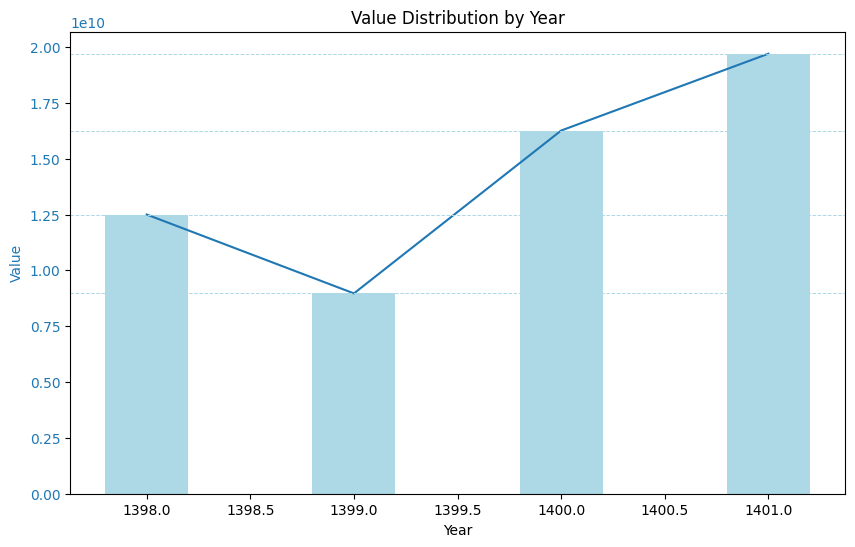

In [14]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set x and y labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Value', color='tab:blue')

# Line plot for value distribution
ax1.plot(distribution.index, distribution.values, color='tab:blue', label='Value Distribution')

# Bar plot for value distribution
ax1.bar(distribution.index, distribution.values, width=0.4, color='lightblue', label='Value Bar')

# Add dashed horizontal lines for each y-value in the distribution
for y_value in distribution.values:
    ax1.axhline(y=y_value, linestyle='--', color='lightblue', linewidth=0.7)

# Set y-axis tick colors to match the line plot
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Set the plot title
plt.title('Value Distribution by Year')

# Show the plot
plt.show()


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> سوال 5 آمار توصیفی </div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [46]:
df1 = pd.read_csv('df_q5.csv')
df1.head()


,Address,behdasht,khoraki,maskan,poshak
0,10001000108,0.0,13424000.0,9012000.0,2250000.0
1,10001000111,0.0,18007000.0,21231000.0,660000.0
2,10001000113,20850000.0,22929000.0,17006000.0,7400000.0
3,10001000114,0.0,5778000.0,8264000.0,0.0
4,10001000116,1500000.0,34169000.0,16088000.0,5550000.0


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی دیتا </div>


In [47]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96198 entries, 0 to 96197
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Address   96198 non-null  int64  
 1   behdasht  96198 non-null  float64
 2   khoraki   96198 non-null  float64
 3   maskan    96198 non-null  float64
 4   poshak    96198 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 3.7 MB


In [48]:
df1.describe()


,Address,behdasht,khoraki,maskan,poshak
count,9.619800e+04,9.619800e+04,9.619800e+04,9.619800e+04,9.619800e+04
mean,1.623172e+10,3.908492e+06,2.573975e+07,1.939174e+07,3.658294e+06
std,5.036020e+09,1.139726e+07,2.313421e+07,2.395730e+07,8.902919e+06
min,1.000100e+10,0.000000e+00,0.000000e+00,1.000000e+05,0.000000e+00
25%,1.140418e+10,8.000000e+04,9.873000e+06,6.100000e+06,0.000000e+00
50%,1.290136e+10,1.000000e+06,1.929725e+07,1.185800e+07,3.200000e+05
75%,2.130354e+10,3.650000e+06,3.447095e+07,2.365925e+07,3.500000e+06
max,2.300671e+10,8.625000e+08,6.707200e+08,8.535550e+08,3.660000e+08


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی مقادیر گمشده </div>


In [49]:
df1.isnull().sum()


Address     0
behdasht    0
khoraki     0
maskan      0
poshak      0
dtype: int64

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> حذف ستون های اضافی </div>


In [50]:
df1 = df1.drop(['Address'],axis=1)
df1


,behdasht,khoraki,maskan,poshak
0,0.0,13424000.0,9012000.0,2250000.0
1,0.0,18007000.0,21231000.0,660000.0
2,20850000.0,22929000.0,17006000.0,7400000.0
3,0.0,5778000.0,8264000.0,0.0
4,1500000.0,34169000.0,16088000.0,5550000.0
...,...,...,...,...
96193,0.0,9960000.0,23130000.0,0.0
96194,2050000.0,51253000.0,78800000.0,19500000.0
96195,3300000.0,23754200.0,46950000.0,33550000.0
96196,8750000.0,8600000.0,40950000.0,300000.0


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار </div>


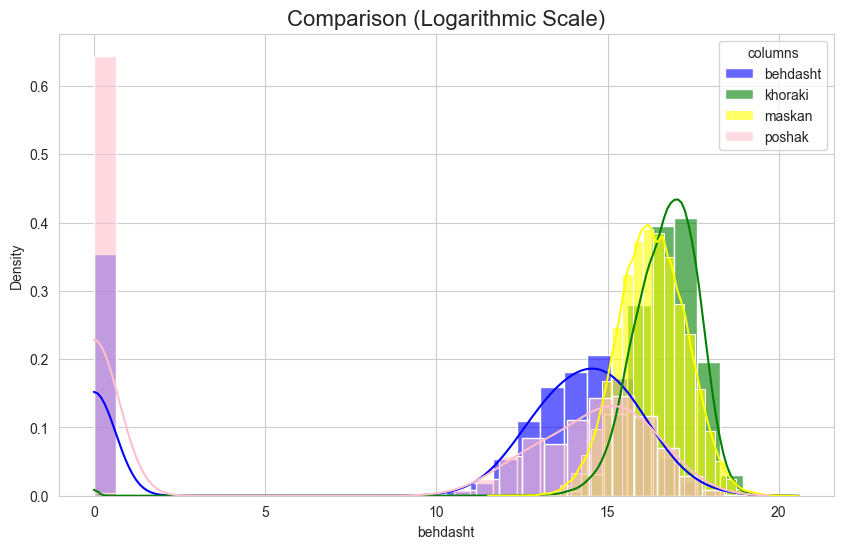

In [51]:
plt.figure(figsize=(10,6))
behdasht_log = np.log1p(df1['behdasht'])
khoraki_log = np.log1p(df1['khoraki'])
maskan_log = np.log1p(df1['maskan'])
poshak_log = np.log1p(df1['poshak'])

sns.histplot(behdasht_log, color='blue', kde=True, label='behdasht', stat='density', bins=30, alpha=0.6)
sns.histplot(khoraki_log, color='green', kde=True, label='khoraki', stat='density', bins=30, alpha=0.6)
sns.histplot(maskan_log, color='yellow', kde=True, label='maskan', stat='density', bins=30, alpha=0.6)
sns.histplot(poshak_log, color='pink', kde=True, label='poshak', stat='density', bins=30, alpha=0.6)

plt.title('Comparison (Logarithmic Scale)', fontsize=16) 
plt.legend(title="columns")
plt.grid(True)
plt.show()


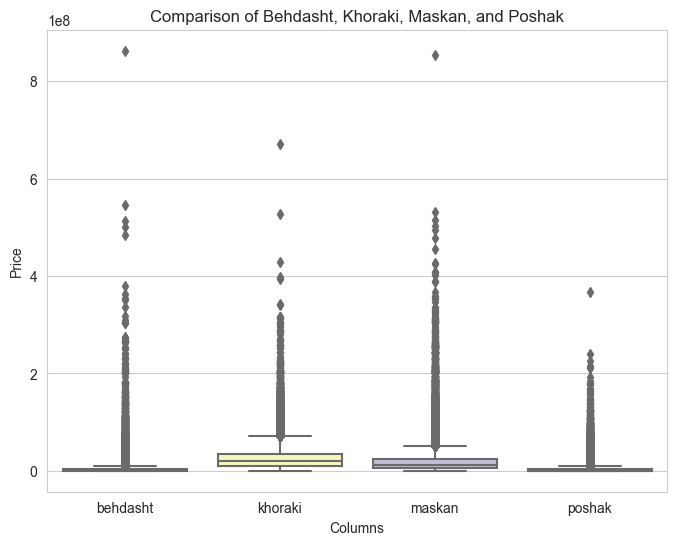

In [52]:
# Melting the dataframe to reshape for boxplot
df_melted = df1.melt(value_vars=['behdasht', 'khoraki', 'maskan', 'poshak'], var_name='Ucolumns', value_name='price')

# Plotting the boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Ucolumns', y='price', data=df_melted, palette='Set3')
plt.title('Comparison of Behdasht, Khoraki, Maskan, and Poshak')
plt.xlabel('Columns')
plt.ylabel('Price')
plt.show() 


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> هندل کردن داده های پرت </div>


In [53]:
def remove_outliers(df, column):
    print("Old Shape: ", df.shape)

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe to remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Print the new shape of the DataFrame
    print("New Shape: ", df_filtered.shape)

    # Combine the filtered data with rows that had NaN values (if you want to keep them)
    #df.update(df_filtered) 

    return df_filtered


In [54]:
df1.shape
df1 = remove_outliers(df1,'poshak')
df1 = remove_outliers(df1,'khoraki')
df1 = remove_outliers(df1,'maskan')
df1 = remove_outliers(df1,'behdasht') 
df1.shape


Old Shape:  (96198, 4)
New Shape:  (84644, 4)
Old Shape:  (84644, 4)
New Shape:  (81317, 4)
Old Shape:  (81317, 4)
New Shape:  (75593, 4)
Old Shape:  (75593, 4)
New Shape:  (68035, 4)


(68035, 4)

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم ماتریس همبستگی </div>


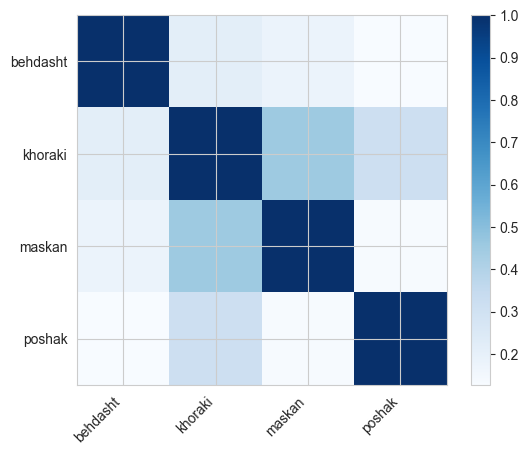

In [55]:
matrix = df1.corr()

# plotting correlation matrix
plt.imshow(matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> سوال 6 آمار توصیفی </div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [59]:
df_q6 = pd.read_csv('df_q6.csv')
df_q6.head()


,Address,year,income_w_y_sum,sale_sum,total_other_sum,income
0,10001000108,98,0.0,0.0,392000000.0,392000000.0
1,10001000111,98,600000000.0,0.0,0.0,600000000.0
2,10001000113,99,240000000.0,0.0,648000000.0,888000000.0
3,10001000114,98,0.0,0.0,144000000.0,144000000.0
4,10001000116,99,0.0,0.0,654000000.0,654000000.0


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی داده ها </div>


In [60]:
df_q6.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132042 entries, 0 to 132041
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Address          132042 non-null  int64  
 1   year             132042 non-null  int64  
 2   income_w_y_sum   132042 non-null  float64
 3   sale_sum         132042 non-null  float64
 4   total_other_sum  132042 non-null  float64
 5   income           132042 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 6.0 MB


In [61]:
df_q6.isna().sum()


Address            0
year               0
income_w_y_sum     0
sale_sum           0
total_other_sum    0
income             0
dtype: int64

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار برای توزیع درآمد اسمی خانوار بر حسب سال</div>


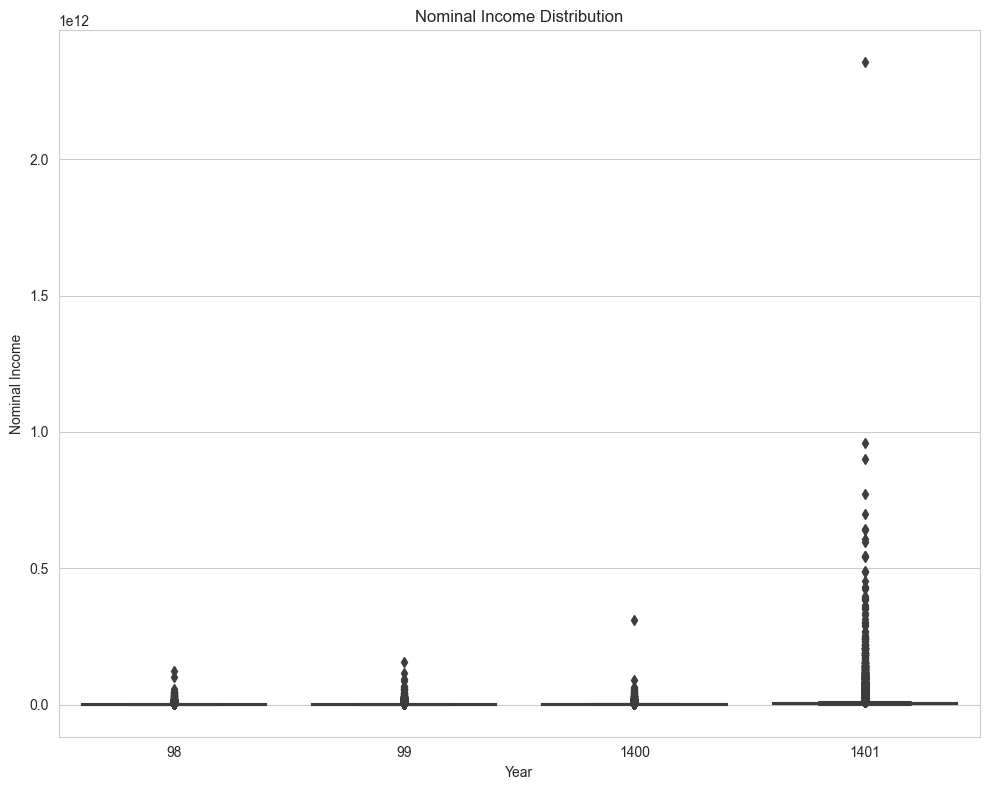

In [62]:
# plotting income distribution
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_q6, x='year', y='income')


plt.title('Nominal Income Distribution')
plt.xlabel('Year')
plt.ylabel('Nominal Income')
plt.tight_layout()
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;">تعریف نرخ تورم سالانه با سال پایه 95</div>

<a href="https://www.cbi.ir/Inflation/Inflation_FA.aspx">منبع(سایت بانک مرکزی)</a>


In [63]:
#defining inflation indicies for each year to calculate real income
inflation_index = {
    1398: 41.2,  
    1399: 47.1,
    1400: 46.2,  
    1401: 46.5   
}
df_q6['year'] = df_q6['year'].astype(int)



### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> تصحیح اعداد سال برای همسان سازی </div>


In [64]:
# replacing 98 and 99 with 1398 and 1399
df_q6['year'] = df_q6['year'].replace({98: 1398, 99: 1399})

df_q6.head()


,Address,year,income_w_y_sum,sale_sum,total_other_sum,income
0,10001000108,1398,0.0,0.0,392000000.0,392000000.0
1,10001000111,1398,600000000.0,0.0,0.0,600000000.0
2,10001000113,1399,240000000.0,0.0,648000000.0,888000000.0
3,10001000114,1398,0.0,0.0,144000000.0,144000000.0
4,10001000116,1399,0.0,0.0,654000000.0,654000000.0


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;">به دست آوردن درآمد حقیقی</div>


In [65]:
# calculating real income
df_q6['real_income'] = df_q6.apply(lambda row: row['income'] / inflation_index.get(int(row['year']), float('nan')), axis=1)
df_q6


,Address,year,income_w_y_sum,sale_sum,total_other_sum,income,real_income
0,10001000108,1398,0.000000e+00,0.000000e+00,392000000.0,3.920000e+08,9.514563e+06
1,10001000111,1398,6.000000e+08,0.000000e+00,0.0,6.000000e+08,1.456311e+07
2,10001000113,1399,2.400000e+08,0.000000e+00,648000000.0,8.880000e+08,1.885350e+07
3,10001000114,1398,0.000000e+00,0.000000e+00,144000000.0,1.440000e+08,3.495146e+06
4,10001000116,1399,0.000000e+00,0.000000e+00,654000000.0,6.540000e+08,1.388535e+07
...,...,...,...,...,...,...,...
132037,23006709832,1400,1.200000e+09,0.000000e+00,0.0,1.200000e+09,2.597403e+07
132038,23006709832,1401,0.000000e+00,1.200000e+09,636530000.0,1.836530e+09,3.949527e+07
132039,23006709835,1401,1.215000e+09,0.000000e+00,129530000.0,1.344530e+09,2.891462e+07
132040,23006709838,1401,0.000000e+00,0.000000e+00,300700000.0,3.007000e+08,6.466667e+06


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار برای توزیع درآمد حقیقی خانوار</div>


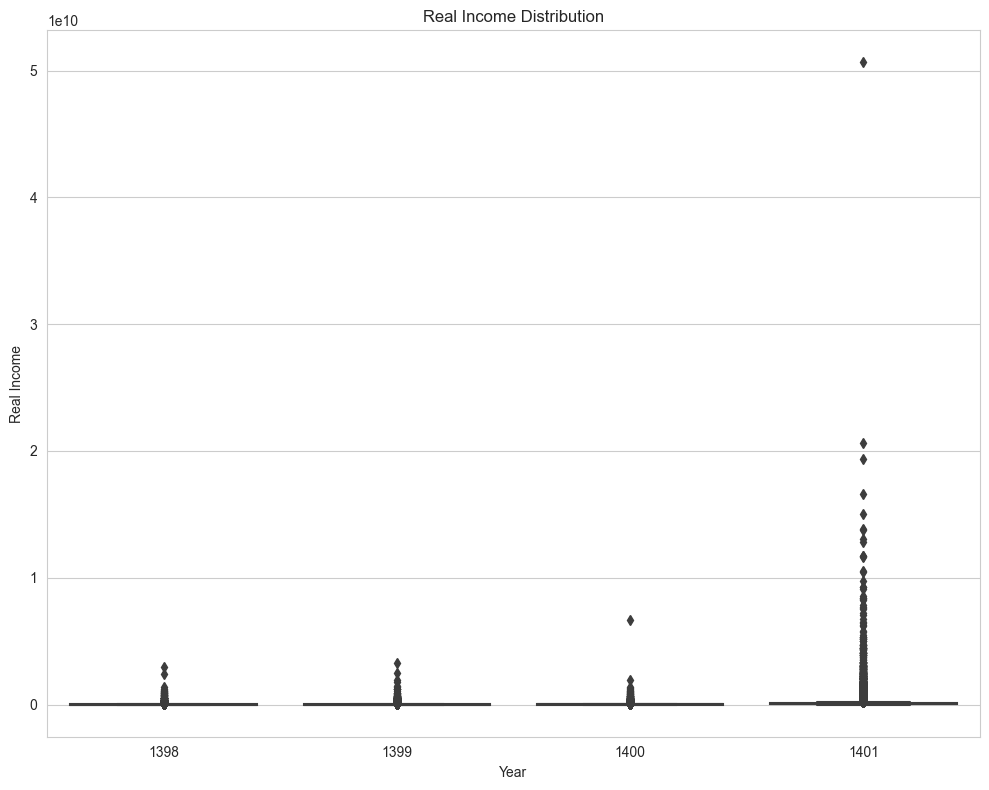

In [66]:
#plotting real income distribution

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_q6, x='year', y='real_income')

plt.title('Real Income Distribution')
plt.xlabel('Year')
plt.ylabel('Real Income')
plt.tight_layout()
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار برای بررسی روند درآمد اسمی و حقیقی در یک صفحه</div>


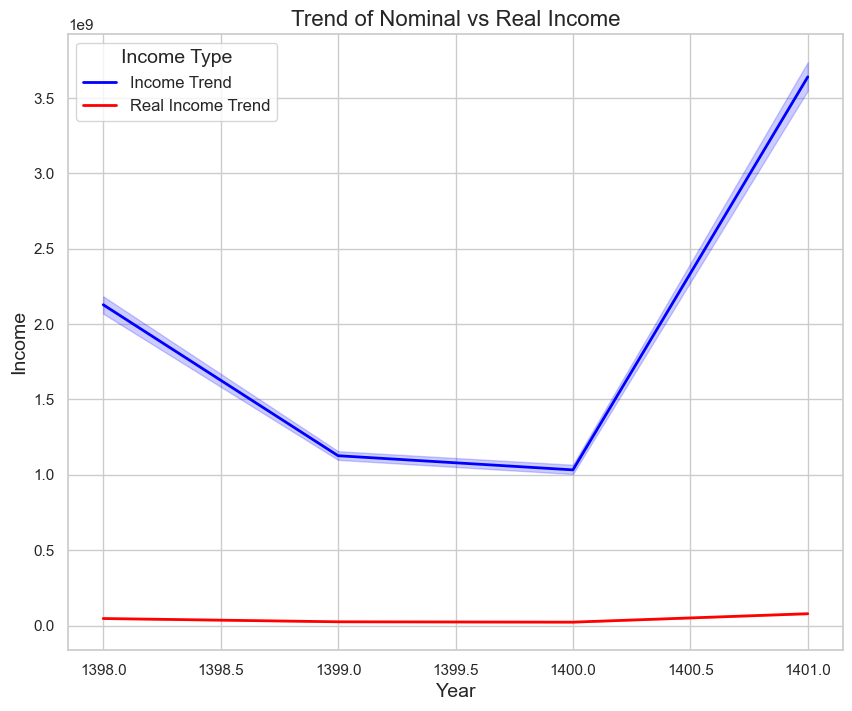

In [67]:
df_q6['income_trend'] = df_q6['income'].rolling(window=5).mean()
df_q6['real_income_trend'] = df_q6['real_income'].rolling(window=5).mean()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))


sns.lineplot(x=df_q6['year'], y=df_q6['income_trend'], label='Income Trend', color='blue', linewidth=2)
sns.lineplot(x=df_q6['year'], y=df_q6['real_income_trend'], label='Real Income Trend', color='red', linewidth=2)

plt.title('Trend of Nominal vs Real Income', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Income', fontsize=14)


plt.legend(title='Income Type', title_fontsize='14', fontsize='12')

plt.show()
